# Ejercicio 1)

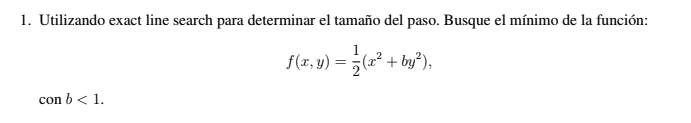

In [ ]:
# Importo librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defino la función objetivo
def funcion_objetivo(x, b):
  return 0.5 * (x[0] ** 2 + b * x[1] ** 2) # Como es mi función objetivo, retorna un escalar (R2 --> R)

In [ ]:
# Defino el gradiente de f
def gradiente_f (x, b):
  return np.array([x[0], b * x[1]]) # Como es una función gradiente, retorna un vector (array)

In [ ]:
# Defino un punto inicial (discrecionalmente), una constante b < 1 (discrecionalmente) y un número máximo de iteraciones para frenar el proceso iterativo en caso de no converger antes
# Además defino una tolerancia para cuando el gradiente evaluado en el punto actual sea prácticamente igual a 0 y haya encontrado el mínimo
x_y = np.array([1.0, 1.0])
b = 0.9
n_iteraciones = 1000
tolerancia = 1e-8

In [ ]:
# Además, se demostró analíticamente en clase que el valor óptimo de alpha para esta función es 2 / 1 + b, por lo que vamos a fijarlo a ese valor y no vamos a buscar el alpha mínimo tal que minimice la función en el paso que estamos dando como marca la teoría
alpha = 2 / (1 + b)

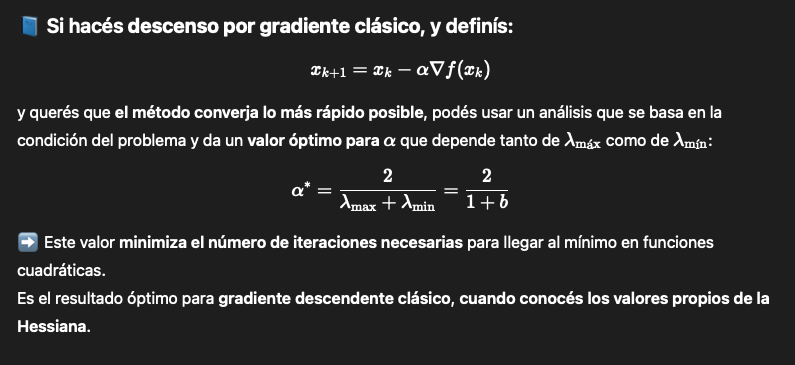

In [ ]:
# Guardo historial para graficar
historia = [x_y.copy()]

# Comienzo el proceso iterativo
for i in range(n_iteraciones):

  # Primero calculo el gradiente en mi punto inicial
  gradiente = gradiente_f(x_y, b)

  # Calculo la norma del gradiente para compararla contra la tolerancia (ambos escalares)
  norma_gradiente = np.linalg.norm(gradiente)

  # Pongo la condición de corte, cuando esté muy cerca del mínimo de la función y el gradiente sea menor o igual a la tolerancia definida
  if norma_gradiente <= tolerancia:
    print(f'El proceso iterativo convergió en {i} iteraciones')
    punto_final = np.round(historia[-1], 2)
    print(f'El punto mínimo de la función es {punto_final}')
    break

  # Luego defino la dirección del descenso
  direccion = - gradiente # p_k = -∇f(x_k)

  # Actualizo el punto
  x_y = x_y + alpha * direccion

  # Guardo el punto para graficar después
  historia.append(x_y.copy())

El proceso iterativo convergió en 7 iteraciones
El punto mínimo de la función es [-0.  0.]


Ahora bien, si "juego" con la constante b, me doy cuenta que si b es mas chica (se acerca a 0) tarda mas en converger que si se acerca a 1.

Concepto:

El número de condición de una matriz hessiana viene determinado por los autovalores máximos y mínimos de la misma. En este ejemplo, siendo b necesariamente menor a 1, siempre será el autovalor mínimo de la matriz. Dicho esto, siendo el número de condicion:

 * Nro condición = lambda máx / lambda mín
 * lambda máx = 1
 * lambda mín → 0 < b < 1

Cuanto más chica sea b (más cercana a 0) , mas alto será el número de condición y mas lento avanza el optimizador (zig-zag). Cuanto más grande sea b, el número de condición se acerca a 1 y la función estará bien condicionada, lo que implica que todas las direcciones tienen una curvatura semejante y el descenso por gradiente funciona más eficientemente.

# Ejercicio 2 (Backtracking)

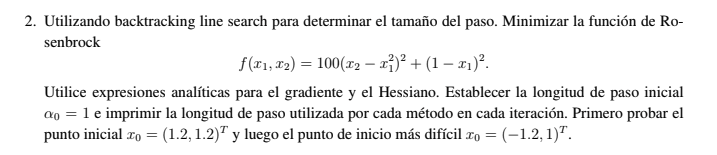

In [ ]:
# Defino mi función de Rosenbrock
def funcion_rosenbrock(x):
  return 100 * ((x[1] - x[0]**2))**2 + (1 - x[0])**2

In [ ]:
# Defino mi función gradiente
def funcion_gradiente_2 (x):
  x1, x2 = x[0], x[1]
  dx1 = - 400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
  dx2 = 200 * (x2 - x1**2)
  return np.array([dx1, dx2])

In [ ]:
# Defino el backtracking line search (condición de Armijo)
def backtracking_armijo (x, funcion_rosenbrock, funcion_gradiente_2, alpha0 = 1, c = 1/3, beta = 0.3):
  alpha = alpha0
  fx = funcion_rosenbrock(x) # Defino la función objetivo aca para limpiar la desigualdad de abajo
  grad_fx = funcion_gradiente_2(x) # Defino el gradiente aca para limpiar la desigualdad de abajo
  while fx - c * alpha * (np.linalg.norm(grad_fx)**2) <= funcion_rosenbrock(x - alpha * grad_fx): # np.linalg.norm me da la norma del vector, hay que tener cuidado con esto! OJO QUE VA UN MENOR O IGUAL --> "Mientras no se cumpla la condición de Armijo, seguí bajando alfa"
    alpha *= beta
  return alpha

In [ ]:
# Ahora que ya tengo función definida para encontrar el alpha, planteo el descenso de gradiente

x = np.array([1.2, 1.2]) # Punto inicial propuesto en el enunciado (1)
# x = np.array([-1.2, 1.0]) # Punto inicial propuesto en el enunciado (2)
n_iteraciones = 100000
tol = 1e-6
historia = [x.copy()]

# x nuevo	= x − α⋅∇f(x)

for i in range (n_iteraciones):

  # Aca seteo una condición de tolerancia, si el gradiente es muy chico, dejo de iterar para evitar cómputo innecesario (lo aprendí del inciso anterior)
  if np.linalg.norm(funcion_gradiente_2(x)) <= tol: # La tolerancia es un número, entonces necesito calcularle la norma al vector para que sean comparables, ahi uso el np.linalg.norm
    print(f'La función converge en {i} iteraciones')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}')
    break

  # Calculo el gradiente en el punto actual
  gradiente = funcion_gradiente_2(x)

  # Calculo el alpha óptimo para el punto en el que estoy parado
  alpha_opt = backtracking_armijo(x, funcion_rosenbrock, funcion_gradiente_2)

  # Actualizo la posición
  x = x - alpha_opt * gradiente

  # Guardo historial
  historia.append(x.copy())

La función converge en 9936 iteraciones
El punto mínimo de la función es [1. 1.]


***Punto inicial (1.2, 1.2), dejo c fijo = 1/3 y varío β***

Aunque a primera vista parece que cuanto más grande sea el valor de β, mejor (porque me permite dar pasos más largos), en la práctica no siempre conviene.


* Cuando uso un β grande (como 0.9), el algoritmo de backtracking reduce muy de a poco el alpha, y eso puede llevar a que el paso final sea demasiado largo. En funciones como la de Rosenbrock, que tienen forma de valle muy curvado, un paso muy grande puede hacerme salir de ese valle o zigzaguear mucho, haciendo que el algoritmo tarde más en corregirse. En este valor de beta, el algoritmo convergió en 15.416 iteraciones.


* En cambio, si uso un β más chico (como 0.3), el alpha se achica más rápido. Capaz el paso es más conservador, pero se adapta mejor a la forma de la función. Al final, aunque cada paso avanza menos, la convergencia total es más eficiente. En este valor de beta, el algoritmo convergió en 9.936 iteraciones.

***Punto inicial (1.2, 1.2), dejo β fijo = 0.3 y varío c***

Lo que controla c es cuán exigente soy con esa bajada mínima que quiero asegurar en la condición de Armijo:

* Si c es pequeño (c = 1/3), estoy conforme con una baja chiquita → la condición se cumple fácilmente → acepto pasos más grandes.

* Si c es más grande (c = 2/3), exijo que la función baje bastante → cuesta más cumplir la condición → acepto pasos más chicos.

Al igual que antes, dar pasos más grandes no necesariamente te acercan a la convergencia más rápidamente.

**La conclusión general es que en funciones con geometría complicada como la de Rosenbrock, avanzar mucho puede ser contraproducente: pasos grandes pueden desviarse del "valle" óptimo, generar oscilaciones o necesitar muchas correcciones posteriores.**

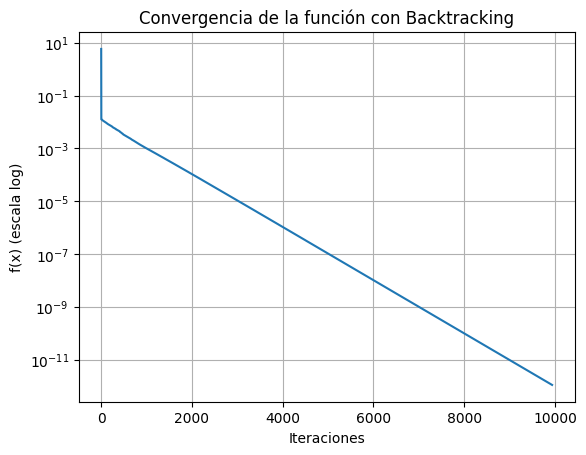

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_rosenbrock(punto) for punto in historia]

# Graficar
plt.plot(valores_funcion)
plt.yscale("log")
plt.title("Convergencia de la función con Backtracking")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

# Ejercicio 2 (Newton)

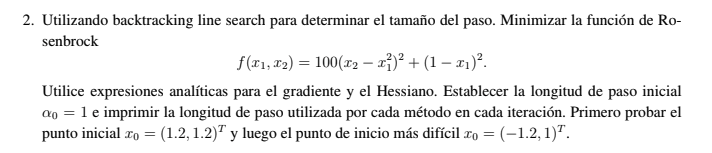

In [ ]:
# Defino mi función de Rosenbrock
def funcion_rosenbrock(x):
  return 100 * ((x[1] - x[0]**2))**2 + (1 - x[0])**2

In [ ]:
# Defino mi función gradiente
def funcion_gradiente_2 (x):
  x1, x2 = x[0], x[1]
  dx1 = - 400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
  dx2 = 200 * (x2 - x1**2)
  return np.array([dx1, dx2])

In [ ]:
# Defino mi función Hessiana
def funcion_hessiana(x):
  x1 = x[0]
  x2 = x[1]
  dx1_2 = 1200 * x1**2 - 400 * x2 + 2
  dx12_cruz = -400 * x1
  dx2_2 = 200
  return np.array([
      [dx1_2, dx12_cruz],
      [dx12_cruz, dx2_2]
      ])

In [ ]:
# Configuraciones iniciales
# x = np.array([1.2, 1.2])  # Punto inicial fácil
x = np.array([-1.2, 1.0])  # Punto inicial difícil
tol = 1e-6
max_iter = 100000
historia = [x.copy()]

In [ ]:
# Comienzo con el proceso iterativo
# x nuevo = x - H-1(x) * ∇f(x)
for i in range (1, max_iter):
  gradiente = funcion_gradiente_2(x)
  hessiana = funcion_hessiana(x)

  # Planteo la condición de corte comparando la norma del gradiente con la tolerancia preestablecida
  if np.linalg.norm(gradiente) <= tol:
    print(f'La función converge en {i} iteracion(es)')
    punto_final = np.round(historia[-1], 0)
    print(f'El mínimo de la función es {punto_final}')
    break

  # En lugar de invertir la hessiana (lo cual no es eficiente ni seguro matemáticamente) uso np.linalg.solve(hessiana, gradiente)
  paso_newton = np.linalg.solve(hessiana, gradiente)

  # Voy al próximo paso de mi proceso iterativo
  x = x - paso_newton

  # Guardo el historial (como siempre)
  historia.append(x.copy())

La función converge en 7 iteracion(es)
El mínimo de la función es [1. 1.]


***Punto inicial (1.2, 1.2)***

El método de Newton converge al mínimo en una sola iteración. Una vez que estoy muy cerca del mínimo (dado el punto inicial), la función de Rosenbrock se comporta bien:

* El gradiente apunta directamente al mínimo.
* La hessiana se vuelve bien condicionada.
* En esa zona, Newton puede usar su modelo cuadrático de manera muy eficiente.

***Punto inicial (-1.2, 1.0)***

El método de Newton converge al mínimo en siete iteraciones. Si bien el número de iteraciones es mayor que en el punto (1.2, 1.2), Newton sigue siendo muchísimo más eficiente que el backtracking estudiado anteriormente. Al estar más lejos del mínimo que en el punto inicial anterior, tiene sentido que sea menos eficiente.

# Ejercicio 2 (Momentum / Nesterov / Adagrad / RMSprop / Adam)

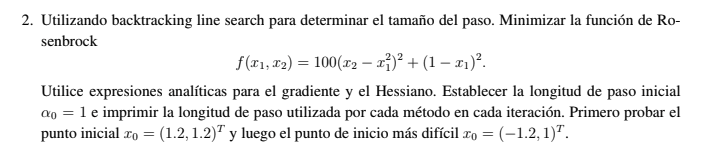

Ahora voy a armar el código un poco más coherente, de forma que me queden las funciones definidas a continuación, y luego poder llamarlas en cada una de las iteraciones de los distintos optimizadores.

In [ ]:
def funcion_rosenbrock (x):
  x1 = x[0]
  x2 = x[1]
  return 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2  # Retorna un escalar

In [ ]:
def gradiente_rosenbrock (x):
  x1 = x[0]
  x2 = x[1]
  return np.array([-400 * x1 * (x2 - x1**2) - 2 * (1 - x1), 200 * (x2 - x1 ** 2)]) # Retorna el vector gradiente de x

In [ ]:
def hessiana_rosenbrock (x):
  x1 = x[0]
  x2 = x[1]
  dx1 = -400 * (x2 - x1**2) * x1 - 2 * (1 - x1) # Derivada primera respecto a x1
  dx12 = 1200 * x1 ** 2 - 400 * x2 + 2 # Derivada segunda respecto a x1
  dcruz = -400 * x1 # Derivada cruzada
  dx2 = 200 * (x2 - x1 ** 2) # Derivada primera respecto a x2
  dx22 = 200 # Derivada segunda respecto a x2
  return np.array([dx12, dcruz],[dcruz, dx22]) # Retorna un array compuesto por dos listas que es en verdad una matriz (Hessiana)

In [ ]:
def backtracking_armijo_rosenbrock(x, x_prev, c = 1e-4, beta_bt = 0.5, alpha0 = 1):
  alpha = alpha0
  y = x + beta * (x - x_prev)  # Punto adelantado para evaluar el gradiente, si estoy en momentum clásico borro esta línea
  d = -gradiente_rosenbrock(y)  # Dirección de descenso desde y (Nesterov)
  # d = -gradiente_rosenbrock(x) + beta * (x - x_prev)  # Dirección de descenso en x (momentum clásico)

  while funcion_rosenbrock(x + alpha * d) > funcion_rosenbrock(x) + c * alpha * gradiente_rosenbrock(y) @ d:
    alpha *= beta_bt  # Si no se cumple Armijo, reduzco alpha

  return alpha

### Momentum / Nesterov

In [ ]:
# Ahora que tengo todas las funciones definidas, puedo empezar el proceso iterativo genérico para este optimizador

# x = np.array([1.2, 1.2]) # Punto inicial (fácil) propuesto en el enunciado
x = np.array([-1.2, 1.0]) # Punto inicial (difícil) propuesto en el enunciado
x_prev = x.copy()  # Memoria para el momentum, definida siempre antes del for
n_iteraciones = 1000
beta = 0.9 # Este valor es discrecional. Al no ser la función de Rosenbrock cuadrática, su Matriz hessiana depende de x1 y x2 y sus autovalores máximos y mínimos varían según cambiemos el punto evaluado
tolerancia = 1e-4 # Me va a permitir comparar el gradiente de la función y romper el ciclo iterativo cuando esta se aproxime a 0
historia = [x.copy()]

# Planteo el ciclo iterativo
for i in range (n_iteraciones):

  # Planteo la condición de corte comparando el gradiente de la función con la tolerancia
  if np.linalg.norm(gradiente_rosenbrock(x)) <= tolerancia:
    print(f'El algoritmo converge en {i} iteraciones')
    punto_final = np.round(historia[-1], 0)
    print(f'El mínimo de la función es {punto_final}')
    break

  x_temp = x.copy() # Guardo x antes de cambiar el punto

  # # Actualizo el paso xk + 1 (Momentum Clásico)
  # x = x + beta * (x - x_prev) - backtracking_armijo_rosenbrock(x) * gradiente_rosenbrock(x)

  # Actualizo el paso xk + 1 (Nesterov)
  x = x + beta * (x - x_prev) - backtracking_armijo_rosenbrock(x, x_prev) * gradiente_rosenbrock(x + beta * (x - x_prev))

  # Actualizo x_prev
  x_prev = x_temp

  # Guardo el historial
  historia.append(x.copy())

El algoritmo converge en 366 iteraciones
El mínimo de la función es [1. 1.]


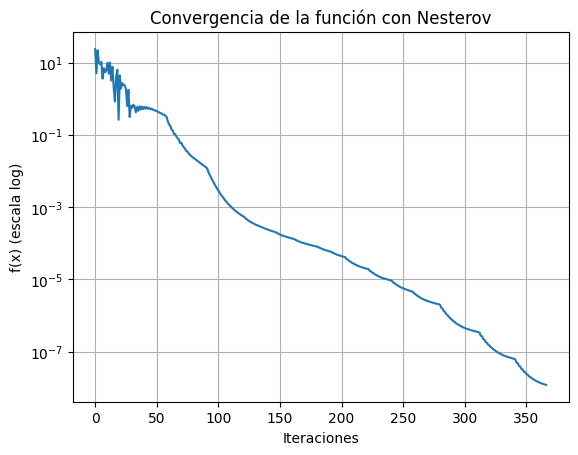

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_rosenbrock(punto) for punto in historia]

# Graficar
plt.plot(valores_funcion)
plt.yscale("log")
plt.title("Convergencia de la función con Nesterov")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### Adagrad

Adagrad es el primero de los métodos adaptativos. En este optimizador, cada coordenada del vector xi (osea cada parámetro) tiene su propio learning rate (alpha) adaptado según su historial de gradientes.

Se introduce un nuevo vector r del mismo tamaño que x que va a contener la suma del cuadrado de los gradientes para cada componente xi.

In [ ]:
# Ahora que tengo todas las funciones definidas, puedo empezar el proceso iterativo genérico para este optimizador

x = np.array([1.2, 1.2]) # Punto inicial (fácil) propuesto en el enunciado
# x = np.array([-1.2, 1.0]) # Punto inicial (difícil) propuesto en el enunciado
n_iteraciones = 100
alpha = 0.2 # En los métodos adaptativos, el alpha se setea discrecionalmente, y la suma de gradientes al cuadrado (Adagrad) se ocupa de achicar el paso en cada iteración. NO SE USA BACKTRACKING.
gamma = 1e-8 # Este valor es discrecional. En el primer paso, el r va a quedar = 0 y no me va a permitir hacer la división en el proceso iterativo
r = np.zeros_like(x)
tolerancia = 1e-8 # Me va a permitir comparar el gradiente de la función y romper el ciclo iterativo cuando esta se aproxime a 0
historia = [x.copy()]

# Planteo el ciclo iterativo

for i in range(n_iteraciones):

  # Condición de corte
  if np.linalg.norm(gradiente_rosenbrock(x)) <= tolerancia:
    print(f'El algoritmo convergió en {i} iteraciones')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}')
    break

  # Actualizo el r (suma del cuadrado de los gradientes para cada componente xi)
  r = r + gradiente_rosenbrock(x) ** 2

  # Actualizo el paso
  x = x - alpha / (np.sqrt(r) + gamma) * gradiente_rosenbrock(x)

  # Guardo historial
  historia.append(x.copy())

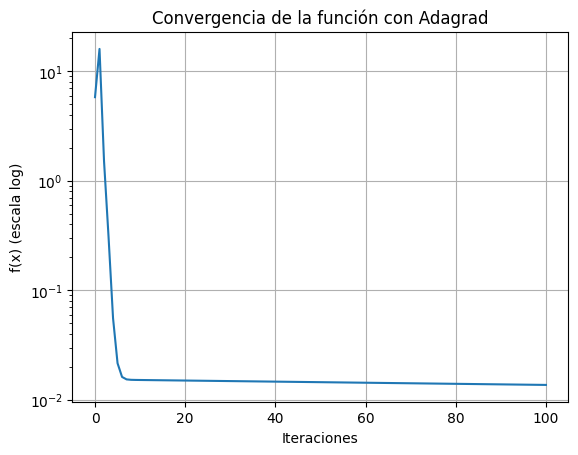

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_rosenbrock(punto) for punto in historia]

# Graficar
plt.plot(valores_funcion)
plt.yscale("log")
plt.title("Convergencia de la función con Adagrad")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### RMSprop

Este optimizador viene a resolver algunas desventajas de Adagrad:

* Acumular gradientes puede ser costoso computacionalmente
* La sumatoria de gradientes al cuadrado se puede volver muy grande para alguna de las componentes xi e incluso crecer indefinidamente
* Consecuentemente alpha se achica con el paso de las iteraciones

In [ ]:
# Ahora que tengo todas las funciones definidas, puedo empezar el proceso iterativo genérico para este optimizador

x = np.array([1.2, 1.2]) # Punto inicial (fácil) propuesto en el enunciado
# x = np.array([-1.2, 1.0]) # Punto inicial (difícil) propuesto en el enunciado
n_iteraciones = 100
alpha = 0.01 # En los métodos adaptativos, el alpha se setea discrecionalmente, y el promedio móvil de gradientes al cuadrado (RMSprop) se ocupa de achicar el paso en cada iteración. NO SE USA BACKTRACKING.
beta = 0.3 # Coeficiente que me va a permitir obtener el promedio móvil del cuadrado de los gradientes
gamma = 1e-8 # Este valor es discrecional. En el primer paso, el r va a quedar = 0 y no me va a permitir hacer la división en el proceso iterativo
r = np.zeros_like(x)
tolerancia = 1e-8 # Me va a permitir comparar el gradiente de la función y romper el ciclo iterativo cuando esta se aproxime a 0
historia = [x.copy()]

# Planteo el ciclo iterativo

for i in range(n_iteraciones):

  # Condición de corte
  if np.linalg.norm(gradiente_rosenbrock(x)) <= tolerancia:
    historia.append(x.copy()) # Guardo el punto final en mi historial
    print(f'El algoritmo convergió en {i} iteraciones')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}')
    break

  # Actualizo el r (suma del cuadrado de los gradientes para cada componente xi)
  r = beta * r + (1 - beta) * gradiente_rosenbrock(x) ** 2

  # Actualizo el paso
  x = x - alpha / (np.sqrt(r) + gamma) * gradiente_rosenbrock(x)

  # Guardo historial
  historia.append(x.copy())

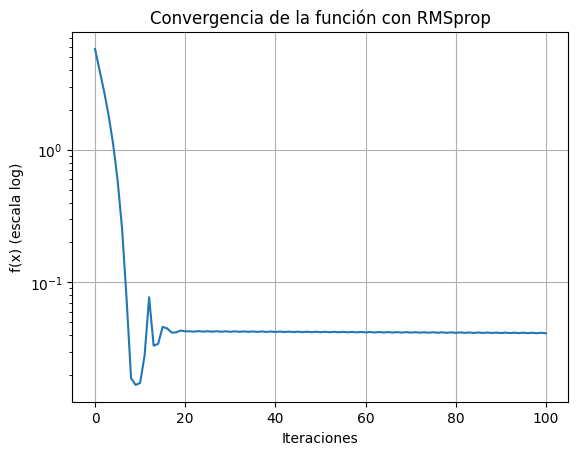

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_rosenbrock(punto) for punto in historia]

# Graficar
plt.plot(valores_funcion)
plt.yscale("log")
plt.title("Convergencia de la función con RMSprop")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

### Adam

In [ ]:
# Ahora que tengo todas las funciones definidas, puedo empezar el proceso iterativo genérico para este optimizador

x = np.array([1.2, 1.2]) # Punto inicial (fácil) propuesto en el enunciado
# x = np.array([-1.2, 1.0]) # Punto inicial (difícil) propuesto en el enunciado
n_iteraciones = 100
alpha = 0.01 # En los métodos adaptativos, el alpha se setea discrecionalmente, y el promedio móvil de gradientes al cuadrado (RMSprop) se ocupa de achicar el paso en cada iteración. NO SE USA BACKTRACKING.
beta_1 = 0.9 # Coeficiente que me va a permitir obtener el promedio móvil del gradiente
beta_2 = 0.9 # Coeficiente que me va a permitir obtener el promedio móvil del gradiente al cuadrado
gamma = 1e-8 # Este valor es discrecional. En el primer paso, el r va a quedar = 0 y no me va a permitir hacer la división en el proceso iterativo
r = np.zeros_like(x)
s = np.zeros_like(x)
tolerancia = 1e-8 # Me va a permitir comparar el gradiente de la función y romper el ciclo iterativo cuando esta se aproxime a 0
historia = [x.copy()]

# Planteo el ciclo iterativo

for i in range(1, n_iteraciones + 1): # A diferencia de los otros optimizadores, este ciclo debe empezar en 1 para evitar que las correcciones de sesgo den 0 en la primera iteración

  # Condición de corte
  if np.linalg.norm(gradiente_rosenbrock(x)) <= tolerancia:
    print(f'El algoritmo convergió en {i} iteraciones')
    punto_final = np.round(historia[-1], 0)
    print(f'El punto mínimo de la función es {punto_final}')
    break

  # Actualizo el s (promedio móvil del gradiente)
  s = beta_1 * s + (1 - beta_1) * gradiente_rosenbrock(x)

  # Actualizo el r (promedio móvil del gradiente al cuadrado)
  r = beta_2 * r + (1 - beta_2) * gradiente_rosenbrock(x) ** 2

  # Corrección de sesgo
  s_hat = s / (1 - beta_1 ** i)
  r_hat = r / (1 - beta_2 ** i)

  # Actualizo el paso
  x = x - alpha / (np.sqrt(r_hat) + gamma) * s_hat

  # Guardo historial
  historia.append(x.copy())

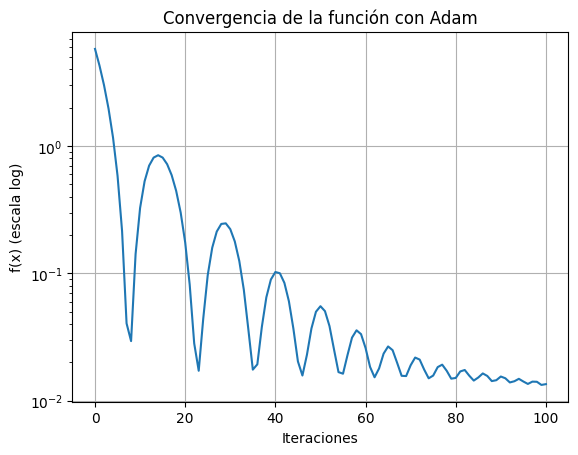

In [ ]:
# Evaluar f(x) en cada punto del historial
valores_funcion = [funcion_rosenbrock(punto) for punto in historia]

# Graficar
plt.plot(valores_funcion)
plt.yscale("log")
plt.title("Convergencia de la función con Adam")
plt.xlabel("Iteraciones")
plt.ylabel("f(x) (escala log)")
plt.grid(True)
plt.show()

# Ejercicio 3)

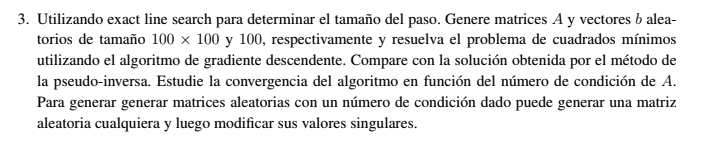

## Gradiente Descendente

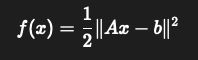

In [ ]:
# Defino mi función objetivo
def funcion_cuadrados_minimos(A, x, b):
    return 0.5 * (np.linalg.norm(A @ x - b) ** 2)

In [ ]:
# Defino mi función gradiente
def funcion_gradiente_cuadrados_minimos(A, x, b):
    return A.T @ (A @ x - b)

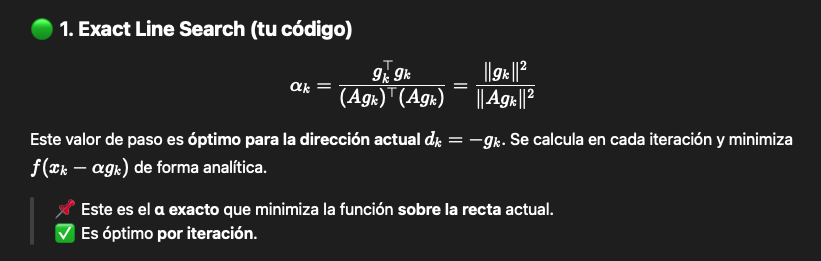

In [ ]:
# Defino una función para aplicar exact line search en funciones cuadraticas convexas como la de cuadrados mínimos
def exact_line_search(A, x, b):
    g = funcion_gradiente_cuadrados_minimos(A, x, b)
    Ag = A @ g
    alpha = (g @ g) / (Ag @ Ag)
    return alpha

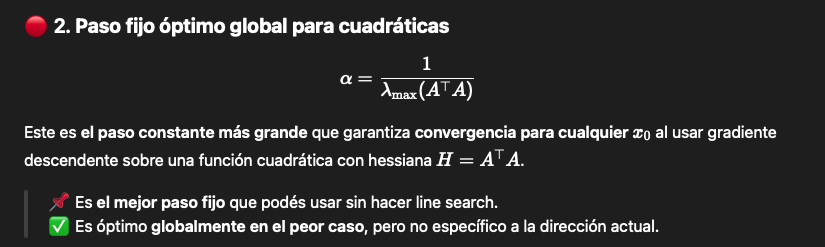

In [ ]:
def paso_optimo(A):
    H = A.T @ A
    lambda_max = np.linalg.eigvalsh(H).max()
    return 1 / lambda_max

In [ ]:
# Defino una función para aplicar GD
def gradiente_descendente(A, b, x0, tolerancia = 1e-8, n_iteraciones = 100):
  x = x0.copy()
  historia = [x.copy()]
  valores_fx = [funcion_cuadrados_minimos(A, x, b)]

  for i in range(n_iteraciones):

    # Defino el gradiente para no tener que escribir la expresión mas de una vez
    grad = funcion_gradiente_cuadrados_minimos(A, x, b)

    # Planteo la condición de corte:
    if np.linalg.norm(grad) <= tolerancia:
      # print(f'El optimizador converge en {i} iteraciones')
      # punto_final = np.round(historia[-1], 0)
      # print(f'El mínimo de la función es {punto_final}')
      break

    # Próximo paso del proceso iterativo
    x = x - exact_line_search(A, x, b) * grad # Exact line search
    # x = x - paso_optimo(A) * grad # 1 / lambda máx -->

    # Guardo historia para poder graficar
    historia.append(x.copy()) # Estos son los puntos de mi proceso iterativo
    valores_fx.append(funcion_cuadrados_minimos(A, x, b)) # Esta es la función evaluada en el punto

  return historia, valores_fx

In [ ]:
# Ahora voy a armar una función que reciba como parámetro un n (A n x n / dimensión de la matriz) y número de condición y devuelva una matriz aleatoria con ese número de condición
def generar_matriz_condicionada(n, n_cond):
    U, _ = np.linalg.qr(np.random.randn(n, n))
    V, _ = np.linalg.qr(np.random.randn(n, n))
    s = np.linspace(1, 1 / n_cond, n)
    S = np.diag(s)
    A = U @ S @ V.T
    return A

In [ ]:
# Planteo el bucle final para evaluar como se comporta la convergencia en función de distintos números de condición

condiciones = [1, 10, 100, 1000]
n = 100
resultados = {}  # Creo un diccionario para guardar los resultados según el número de condición

for cond in condiciones:

    # Primero lógicamente genero la matriz aleatoria con número de condición deseado
    A = generar_matriz_condicionada(n, cond)

    # Segundo genero un vector b aleatorio
    b = np.random.randn(n)

    # Defino un punto inicial x0 = 0
    x0 = np.zeros(n)

    # Aplico el GD llamando a mi función
    historia, valores_fx = gradiente_descendente(A, b, x0)

    # Comparo contra la solución de la pseudo-inversa
    x_gd = historia[-1]  # Solución aproximada por GD
    x_pseudo = np.linalg.pinv(A) @ b  # Solución exacta de mínimos cuadrados contra la que luego comparo el resultado del gradiente descendente iterativo
    error_relativo = np.linalg.norm(x_gd - x_pseudo) / np.linalg.norm(x_pseudo)

    # Muestro el error relativo y número de iteraciones
    print(f'Condición {cond:>4}: Error relativo = {error_relativo:.2e}, Iteraciones = {len(historia)-1}')

    # Guardo los resultados fx (evaluación en la función objetivo) en mi diccionario
    resultados[cond] = valores_fx

Condición    1: Error relativo = 1.29e-15, Iteraciones = 1
Condición   10: Error relativo = 3.45e-02, Iteraciones = 100
Condición  100: Error relativo = 9.71e-01, Iteraciones = 100
Condición 1000: Error relativo = 9.97e-01, Iteraciones = 100


Interpretación:

Cuando la condición de la matriz A es buena (≈ 1), el algoritmo converge en una sola iteración y encuentra prácticamente la misma solución que la pseudo-inversa (error ~ 1e-15).

A medida que el número de condición aumenta (10, 100, 1000), el algoritmo requiere más iteraciones y su solución se aleja cada vez más de la solución óptima (error relativo crece).

Esto confirma que la convergencia del gradiente descendente depende fuertemente del número de condición de A.

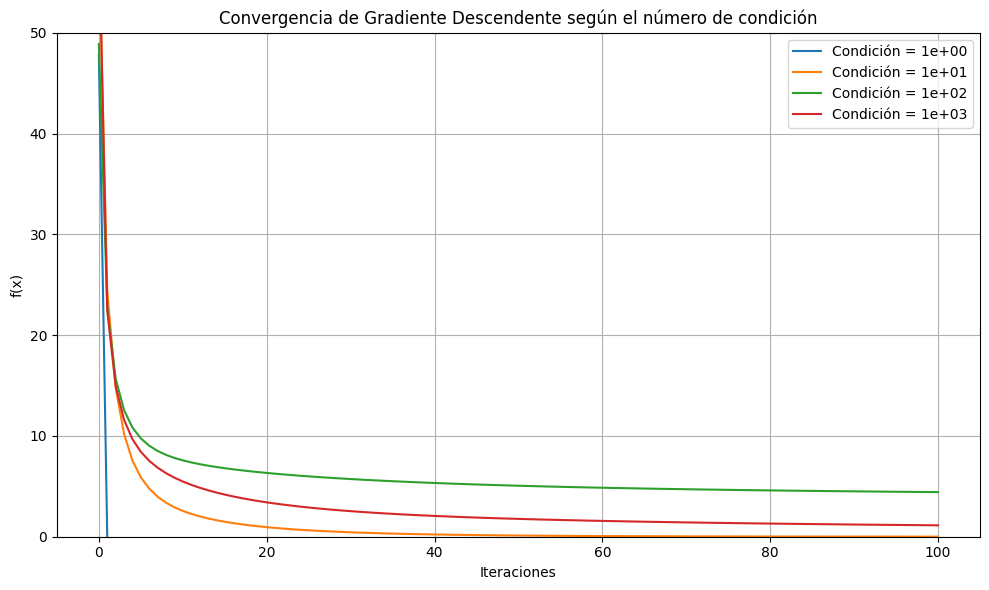

In [ ]:
plt.figure(figsize=(10, 6))

# Recorro el diccionario y grafico cada curva
for cond, fx_vals in resultados.items():
    plt.plot(fx_vals, label=f'Condición = {cond:.0e}')

plt.yscale('linear')  # Escala logarítmica en el eje y para ver mejor la convergencia
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')
plt.ylim(0, 50)
plt.title('Convergencia de Gradiente Descendente según el número de condición')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()